# Exercise 3

## Exercise 3.1

Understand the code in **blr-predictive.py**

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from scipy.stats import multivariate_normal
import pandas as pd
import seaborn as sns

sns.set_style("darkgrid")

### Import Data

In [53]:
mat = scipy.io.loadmat("lindata.mat")
data = pd.DataFrame(
    {
        'X' : [x[0] for x in mat['X']],
        'Y' : [y[0] for y in mat['Y']]
    }
)
beta = (mat["sigma"]**(-2))

x = np.array(data["X"])  # inputs
y = np.array(data["Y"])  # outputs

### Initialise Priors

In [54]:
# Calculate dimension of of feature vector
D = len(data.columns)

# Initialise Priors
mu0 = np.zeros(D)
sigma0 = np.eye(D)*5

X = np.array(
    [
        np.ones(len(x)),
        x
    ]
).T

### Regression

We have:

$$
p(w) \sim N(w, m_0, S_0)
$$

$$
p(y|w) \sim N(y; Xw, \beta^{-1}I_n)
$$

We will use corollary 1 to calculate posterior

In [55]:
Sn = np.linalg.inv(
    np.linalg.inv(sigma0)@mu0 + beta * X.T @ X
)
mn = Sn@(np.linalg.inv(sigma0)@mu0 + beta*X.T@y)

### Show prior and posterior

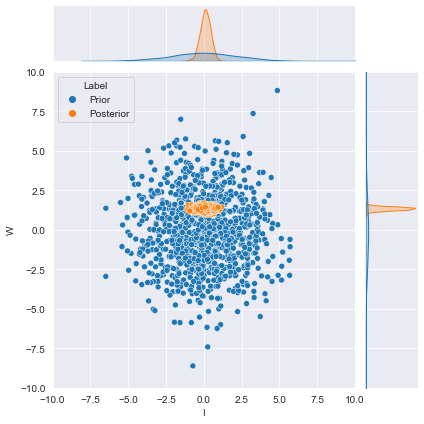

In [56]:
prior = pd.DataFrame(
    multivariate_normal(mean=mu0, cov=sigma0).rvs(size=1000),
    columns = ["I", "W"]
)
prior['Label'] = "Prior"

posterior = pd.DataFrame(
    multivariate_normal(mean=mn, cov=Sn).rvs(size=1000),
    columns = ["I", "W"]
)
posterior['Label'] = "Posterior"

experiment = pd.concat([prior, posterior], ignore_index=True)

sns.jointplot(data=experiment, x="I", y="W", hue="Label", xlim=[-10, 10], ylim=[-10, 10])

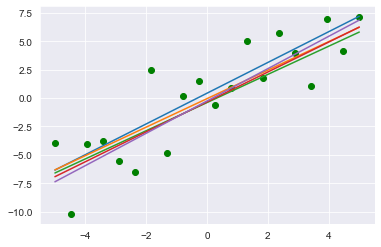

In [57]:
plt.plot(data["X"], data["Y"], 'go')

# Plot 5 samples
for _ in range(0, 5):
    I, W = multivariate_normal(mean=mn, cov=Sn).rvs(size=1)
    plt.plot(data["X"], I + data["X"]*W)

### Regression with less data

In [58]:
Sn = np.linalg.inv(
    np.linalg.inv(sigma0)@mu0 + beta * X[:5].T @ X[:5]
)
mn = Sn@(np.linalg.inv(sigma0)@mu0 + beta*X[:5].T@y[:5])

### Plot prior and posterior

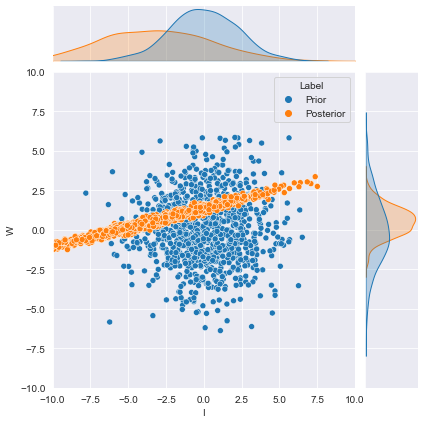

In [59]:
prior = pd.DataFrame(
    multivariate_normal(mean=mu0, cov=sigma0).rvs(size=1000),
    columns = ["I", "W"]
)
prior['Label'] = "Prior"

posterior = pd.DataFrame(
    multivariate_normal(mean=mn, cov=Sn).rvs(size=1000),
    columns = ["I", "W"]
)
posterior['Label'] = "Posterior"

experiment = pd.concat([prior, posterior], ignore_index=True)

sns.jointplot(data=experiment, x="I", y="W", hue="Label", xlim=[-10, 10], ylim=[-10, 10])

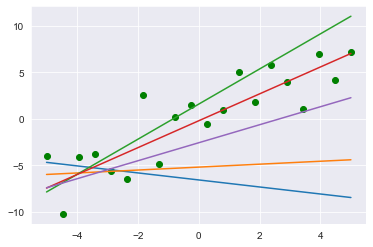

In [60]:
plt.plot(data["X"], data["Y"], 'go')

# Plot 5 samples
for _ in range(0, 5):
    I, W = multivariate_normal(mean=mn, cov=Sn).rvs(size=1)
    plt.plot(data["X"], I + data["X"]*W)

## Exercise 3.2 Other Data

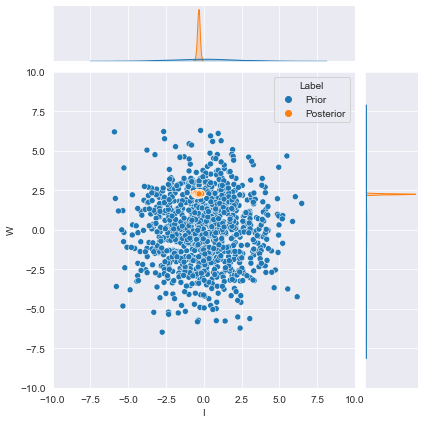

In [61]:
mat = scipy.io.loadmat("nlindata.mat")
data = pd.DataFrame(
    {
        'X' : [x[0] for x in mat['X']],
        'Y' : [y[0] for y in mat['Y']]
    }
)
beta = (mat["sigma"]**(-2))

x = np.array(data["X"])  # inputs
y = np.array(data["Y"])  # outputs

Sn = np.linalg.inv(
    np.linalg.inv(sigma0)@mu0 + beta * X.T @ X
)
mn = Sn@(np.linalg.inv(sigma0)@mu0 + beta*X.T@y)

prior = pd.DataFrame(
    multivariate_normal(mean=mu0, cov=sigma0).rvs(size=1000),
    columns = ["I", "W"]
)
prior['Label'] = "Prior"

posterior = pd.DataFrame(
    multivariate_normal(mean=mn, cov=Sn).rvs(size=1000),
    columns = ["I", "W"]
)
posterior['Label'] = "Posterior"

experiment = pd.concat([prior, posterior], ignore_index=True)

sns.jointplot(data=experiment, x="I", y="W", hue="Label", xlim=[-10, 10], ylim=[-10, 10])

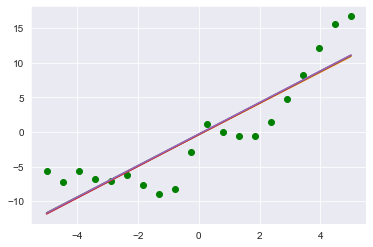

In [62]:
plt.plot(data["X"], data["Y"], 'go')

# Plot 5 samples
for _ in range(0, 5):
    I, W = multivariate_normal(mean=mn, cov=Sn).rvs(size=1)
    plt.plot(data["X"], I + data["X"]*W)

The relationship seems more complicated than a traditional linear regression.
We may want to extend this to a model that has a larger hypothesis space.

## Read data

In [80]:
mat = scipy.io.loadmat("nlindata.mat")
data = pd.DataFrame(
    {
        'X' : [x[0] for x in mat['X']],
        'Y' : [y[0] for y in mat['Y']]
    }
)
beta = (mat["sigma"]**(-2))

x = np.array(data["X"])  # inputs
y = np.array(data["Y"])  # outputs

# Calculate dimension of of feature vector
D = len(data.columns)

# Initialise Priors
mu0 = np.zeros(D)
sigma0 = np.eye(D)*5

X = np.array(
    [
        np.ones(len(x)),
        x,
        x**2
    ]
).T

### New Priors

In [81]:
# Calculate dimension of of feature vector
D = len(X[0, :])

# Initialise Priors
mu0 = np.zeros(D)
sigma0 = np.eye(D)*5

### Calculate new posterior

In [82]:
Sn = np.linalg.inv(
    np.linalg.inv(sigma0)@mu0 + beta * X.T @ X
)
mn = Sn@(np.linalg.inv(sigma0)@mu0 + beta*X.T@y)

### Plot prior and posterior histograms

In [84]:
prior = pd.DataFrame(
    multivariate_normal(mean=mu0, cov=sigma0).rvs(size=1000),
    columns = ["I", "W0", "W1"]
)
prior['Label'] = "Prior"

posterior = pd.DataFrame(
    multivariate_normal(mean=mn, cov=Sn).rvs(size=1000),
    columns = ["I", "W0", "W1"]
)
posterior['Label'] = "Posterior"

experiment = pd.concat([prior, posterior], ignore_index=True)

<AxesSubplot:xlabel='I', ylabel='Count'>

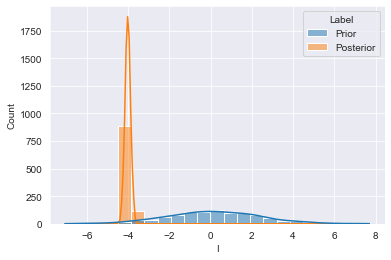

In [91]:
sns.histplot(data=experiment, x="I", hue="Label", kde=True)

<AxesSubplot:xlabel='W0', ylabel='Count'>

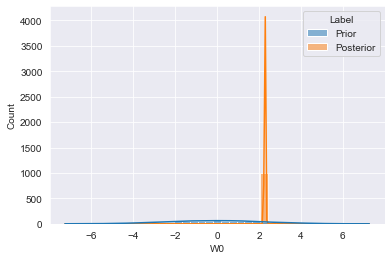

In [92]:
sns.histplot(data=experiment, x="W0", hue="Label", kde=True)

<AxesSubplot:xlabel='W1', ylabel='Count'>

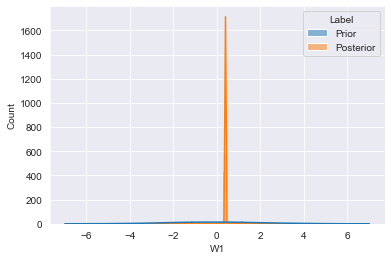

In [93]:
sns.histplot(data=experiment, x="W1", hue="Label", kde=True)

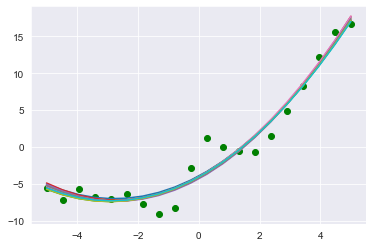

In [98]:
plt.plot(data["X"], data["Y"], 'go')

# Plot 5 samples
for _ in range(0, 10):
    I, W1, W2 = multivariate_normal(mean=mn, cov=Sn).rvs(size=1)
    plt.plot(data["X"], I + data["X"]*W1 + data["X"]**2*W2)

### Step Function

In [192]:
X = np.array(
    [
        np.heaviside(x-8, 0),
        np.heaviside(x-6, 0),
        np.heaviside(x-4, 0),
        np.heaviside(x-2, 0),
        np.heaviside(x, 0),
        np.heaviside(x+2, 0),
        np.heaviside(x+4, 0),
        np.heaviside(x+6, 0),
        np.heaviside(x+8, 0)
    ]
).T

# Calculate dimension of of feature vector
D = len(X[0, :])

# Initialise Priors
mu0 = np.zeros(D)
sigma0 = np.eye(D)*5

### Calculate new posterior

In [194]:
Sn = np.linalg.pinv(
    np.linalg.inv(sigma0)@mu0 + beta * X.T @ X
)
mn = Sn@(np.linalg.inv(sigma0)@mu0 + beta*X.T@y)

### Visualise posterior

In [195]:
prior = pd.DataFrame(
    multivariate_normal(mean=mu0, cov=sigma0).rvs(size=1000),
    columns = ["H-8", "H-6", "H-4", "H-2", "H", "H+2", "H+4", "H+6", "H+8"]
)
prior['Label'] = "Prior"

posterior = pd.DataFrame(
    multivariate_normal(mean=mn, cov=Sn, allow_singular=True).rvs(size=1000),
    columns = ["H-8", "H-6", "H-4", "H-2", "H", "H+2", "H+4", "H+6", "H+8"]
)
posterior['Label'] = "Posterior"

experiment = pd.concat([prior, posterior], ignore_index=True)

### Visualise prior and posterior

Im not even gonna bother visualising all the parameters at this point.

<AxesSubplot:xlabel='H+2', ylabel='Count'>

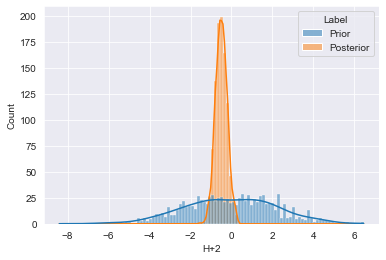

In [196]:
sns.histplot(data=experiment, x="H+2", hue="Label", kde=True)

### Show samples of posterior

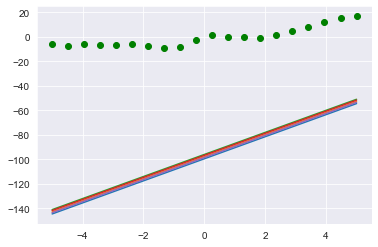

In [198]:
plt.plot(data["X"], data["Y"], 'go')

# Plot 5 samples
for _ in range(0, 5):
    H = multivariate_normal(mean=mn, cov=Sn, allow_singular=True).rvs(size=1)
    plt.plot(
        data["X"],
        data["X"]-8 * H[0] + \
        data["X"]-6 * H[1] + \
        data["X"]-4 * H[2] + \
        data["X"]-2 * H[3] + \
        data["X"]-0 * H[4] + \
        data["X"]+2 * H[5] + \
        data["X"]+4 * H[6] + \
        data["X"]+6 * H[7] + \
        data["X"]+8 * H[8]
    )